Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("HW_data.csv")
data.head


<bound method NDFrame.head of             x         y
0   -3.141593 -0.228450
1   -3.135303 -0.390851
2   -3.129014 -0.466575
3   -3.122724  0.253540
4   -3.116435 -0.059069
..        ...       ...
995  3.116435 -0.189928
996  3.122724 -0.477250
997  3.129014  0.322295
998  3.135303  0.136544
999  3.141593 -0.123016

[1000 rows x 2 columns]>

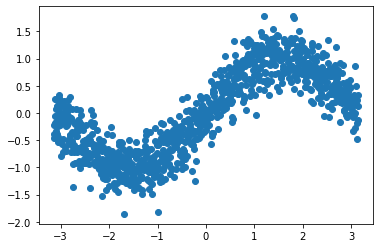

In [4]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])


Split into Train/Test


In [5]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,0].values
y = data.iloc[:,1].values
X_train, X_test, Y_train, Y_test =train_test_split(x,y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape)

(800,) (200,)


In [6]:
X_train =X_train.reshape(-1,1)
X_test =X_test.reshape(-1,1)
Y_train =Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Linear Regression

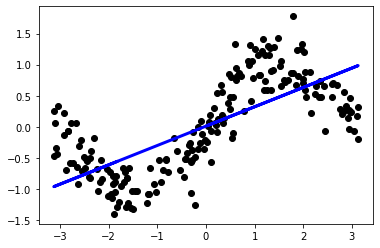

In [7]:
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, diabetes_y_pred, color="blue", linewidth=3)

Polynomial Regression

In [8]:
def poly(x, degree):
    n,m = x.shape
    res = np.empty((n,m*degree+1))
    res[:,0] = np.ones(n)
    for i in range(1,degree+1):
        for j in range(m):
            res[:,(i-1)*m+j+1] = np.power(x[:,j],i)
    return res

test_poly = poly(X_test,5)
test_poly.shape



(200, 6)

In [9]:
x_poly1 = poly(X_test,1)
x_poly2 = poly(X_test,2)
x_poly3 = poly(X_test,3)
y_std = (y-y.min())/(y.max()-y.min())
y_std

array([0.44782026, 0.4031288 , 0.38229018, 0.58045969, 0.4944323 ,
       0.45820769, 0.52890974, 0.46456209, 0.41878867, 0.5768067 ,
       0.5406279 , 0.40585939, 0.54343581, 0.39015571, 0.44698014,
       0.36322373, 0.58768329, 0.60210547, 0.51626703, 0.57500109,
       0.54033812, 0.45137366, 0.48713767, 0.562409  , 0.37608655,
       0.29233833, 0.56670534, 0.47166352, 0.35448842, 0.31157709,
       0.49698288, 0.37833498, 0.47852116, 0.5136356 , 0.57243138,
       0.47273322, 0.34055271, 0.5393475 , 0.48346052, 0.44355567,
       0.48958725, 0.31818772, 0.53678446, 0.51556185, 0.44845997,
       0.45878359, 0.37425602, 0.54453915, 0.5771051 , 0.49189003,
       0.49238861, 0.35814645, 0.5925225 , 0.39984917, 0.39827022,
       0.48283013, 0.34979091, 0.47831758, 0.31474869, 0.5283399 ,
       0.36990662, 0.4136703 , 0.3180199 , 0.13864906, 0.25304638,
       0.34876944, 0.31214545, 0.33843775, 0.45358409, 0.25692004,
       0.40719726, 0.45839512, 0.39330305, 0.5287769 , 0.33533

In [11]:
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [13]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")

        return current_weight, current_bias
     

In [14]:
w, losses = gradient_descent(x_poly3,y_std)

ValueError: operands could not be broadcast together with shapes (1000,) (200,4) 

Sigmoid Function

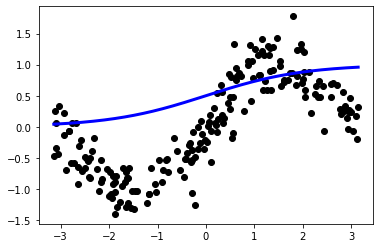

In [12]:
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np


#calculate sigmoid function for each x-value
y = expit(x)
  
#create plot
plt.scatter(X_test, Y_test, color="black")
plt.plot(x, y, color="blue", linewidth=3)


#display plot
plt.show()
